To randomly generate multiple $\text{random\_theta}$ values and compute both the MSE and the condition number of the interpolation matrix for each, we can follow these steps:

1. Generate a number of random values for $\text{random\_theta}$.
2. For each value, create a $\theta\_vals$ vector.
3. Calculate the MSE for each $\theta\_vals$.
4. Compute the condition number of the interpolation matrix for each $\theta\_vals$.

In [1]:
import numpy as np

def interp_matrix(theta_vals):
    # Create interpolation matrix
    return np.array([[1, np.cos(val), np.sin(val)] for val in theta_vals])

def mse(theta_vals):
    # Create interpolation matrix
    A = interp_matrix(theta_vals)
    return np.trace(np.linalg.inv(A.T @ A))

def condition_number(matrix):
    # Compute the condition number of the matrix
    return np.linalg.cond(matrix)

# Number of random tests
num_tests = 10

# Define the interval 2pi/3
interval = 2 * np.pi / 3

# Perform the tests
results = []
for _ in range(num_tests):
    # Generate a random theta value between 0 and 2pi
    random_theta = np.random.uniform(0, 2 * np.pi)

    # Create theta_vals by adding 2pi/3 and shifting within 0 to 2pi
    theta_vals = np.array([random_theta, random_theta + interval, random_theta + 2 * interval]) % (2 * np.pi)
    
    # Calculate the MSE for the generated theta_vals
    mse_value = mse(theta_vals)
    
    # Calculate the condition number of the interpolation matrix
    condition_num = condition_number(interp_matrix(theta_vals))
    
    # Store the results
    results.append((mse_value, condition_num))

# Print the results
for i, (mse_value, condition_num) in enumerate(results):
    print(f"Test {i+1}: MSE = {mse_value:.4f}, Condition Number = {condition_num:.4f}")

Test 1: MSE = 1.6667, Condition Number = 1.4142
Test 2: MSE = 1.6667, Condition Number = 1.4142
Test 3: MSE = 1.6667, Condition Number = 1.4142
Test 4: MSE = 1.6667, Condition Number = 1.4142
Test 5: MSE = 1.6667, Condition Number = 1.4142
Test 6: MSE = 1.6667, Condition Number = 1.4142
Test 7: MSE = 1.6667, Condition Number = 1.4142
Test 8: MSE = 1.6667, Condition Number = 1.4142
Test 9: MSE = 1.6667, Condition Number = 1.4142
Test 10: MSE = 1.6667, Condition Number = 1.4142


This Python code performs an analysis of the impact of different intervals on the Mean Squared Error (MSE) and condition number of an interpolation matrix, using random angles $\theta$. It generates plots to visualize these effects.

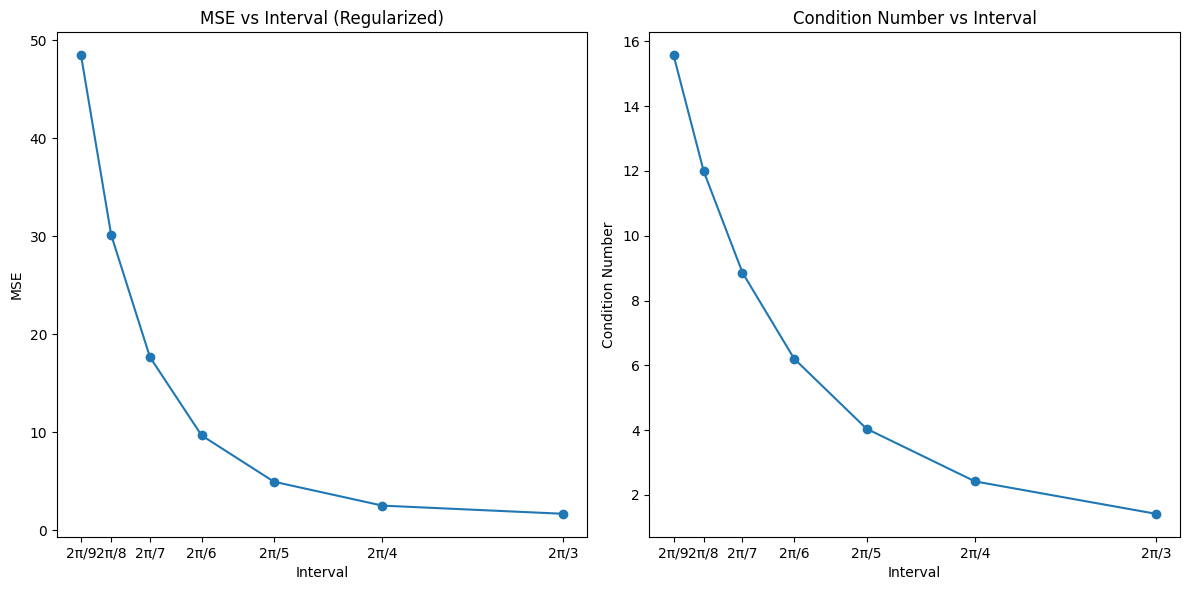

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def interp_matrix(theta_vals):
    # Create interpolation matrix
    return np.array([[1, np.cos(val), np.sin(val)] for val in theta_vals])

def mse(theta_vals, regularization=1e-8):
    # Create interpolation matrix with regularization
    A = interp_matrix(theta_vals)
    return np.trace(np.linalg.inv(A.T @ A + regularization * np.eye(A.shape[1])))

def condition_number(matrix):
    # Compute the condition number of the matrix
    return np.linalg.cond(matrix)

# Number of random tests
num_tests = 10

# Define the specific intervals to test
intervals = [2 * np.pi / n for n in range(3, 10)]

# Store results for each interval
mse_results = []
condition_results = []

# Generate a random theta value between 0 and 2pi
random_theta = np.random.uniform(0, 2 * np.pi)

# Perform the tests for each interval
for interval in intervals:
    mse_values = []
    condition_numbers = []
    for _ in range(num_tests):
        
        # Create theta_vals by adding interval and shifting within 0 to 2pi
        theta_vals = np.array([random_theta, random_theta + interval, random_theta + 2 * interval]) % (2 * np.pi)
        
        # Calculate the MSE for the generated theta_vals with regularization
        mse_value = mse(theta_vals)
        
        # Calculate the condition number of the interpolation matrix
        condition_num = condition_number(interp_matrix(theta_vals))
        
        # Store the results
        mse_values.append(mse_value)
        condition_numbers.append(condition_num)
    
    # Append the average results for this interval
    mse_results.append(np.mean(mse_values))
    condition_results.append(np.mean(condition_numbers))

# Plot the results
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(intervals, mse_results, marker='o')
plt.title('MSE vs Interval (Regularized)')
plt.xlabel('Interval')
plt.ylabel('MSE')
plt.xticks(intervals, labels=[f"2π/{n}" for n in range(3, 10)])

plt.subplot(1, 2, 2)
plt.plot(intervals, condition_results, marker='o')
plt.title('Condition Number vs Interval')
plt.xlabel('Interval')
plt.ylabel('Condition Number')
plt.xticks(intervals, labels=[f"2π/{n}" for n in range(3, 10)])

plt.tight_layout()
plt.show()